Based on https://pareekshithkatti.medium.com/predicting-car-prices-using-multivariate-linear-regression-fcd54050c613

### Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data preparation

In [2]:
cardata=pd.read_csv('data/CarPrice_Assignment.csv')

In [3]:
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cardata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
# Check for null values
cardata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Descriptive statistics
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Now, we shall do some processing of our data.

1) We only want the company name. So lets split the CarName and extract only company name. We will rename it to Company to avoid confusion.

2) We will calculate total miles per gallon and remove citympg and highwaympg

3) We do not require ID as well so lets remove that as well.

4) We will change the datatype of symboling to string since its a categorical variable and should not be confused to be continuous.

In [7]:
cardata['CarName']=cardata['CarName'].apply(lambda name: name.split()[0])
cardata.rename(index=str,columns={'CarName':'Company'},inplace=True)
cardata['total_mpg']=(55*cardata['citympg']/100)+(45*cardata['highwaympg']/100)
cardata.drop(['car_ID','citympg','highwaympg'],axis=1,inplace=True)
cardata.symboling=cardata.symboling.astype(str)
cardata.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [8]:
# Companies present on our data
cardata.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# Fix some names
cardata.Company.replace('maxda','mazda',inplace=True)
cardata.Company.replace('Nissan','nissan',inplace=True)
cardata.Company.replace('porcshce','porsche',inplace=True)
cardata.Company.replace('toyouta','toyota',inplace=True)
cardata.Company.replace('vokswagen','volkswagen',inplace=True)
cardata.Company.replace('vw','volkswagen',inplace=True)

In [10]:
cardata.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Data analysis

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 [<matplotlib.patches.Polygon at 0x7fc4a0b20f10>])

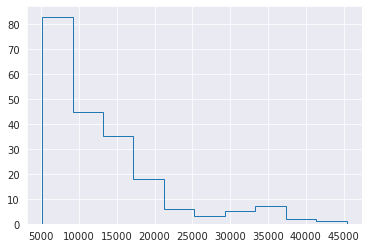

In [11]:
sns.set_style('darkgrid')
plt.hist(cardata['price'],histtype='step')

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

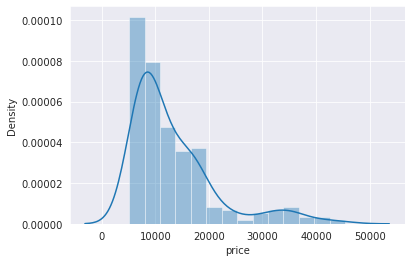

In [12]:
# Distribution of prices
sns.distplot(cardata.price)

In [13]:
print('Mean:',cardata.price.mean())
print('Median:',cardata.price.median())
print('Standard Deviation:',cardata.price.std())
print('Variance:',cardata.price.var())

Mean: 13276.710570731706
Median: 10295.0
Standard Deviation: 7988.85233174315
Variance: 63821761.57839796


<AxesSubplot:ylabel='price'>

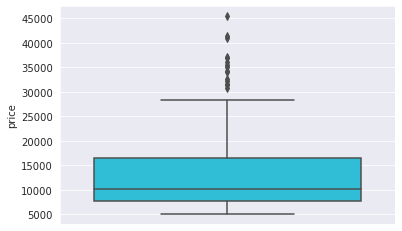

In [14]:
# Boxplot of prices
sns.boxplot(y=cardata.price,color='#13d2f2')

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Company', ylabel='count'>

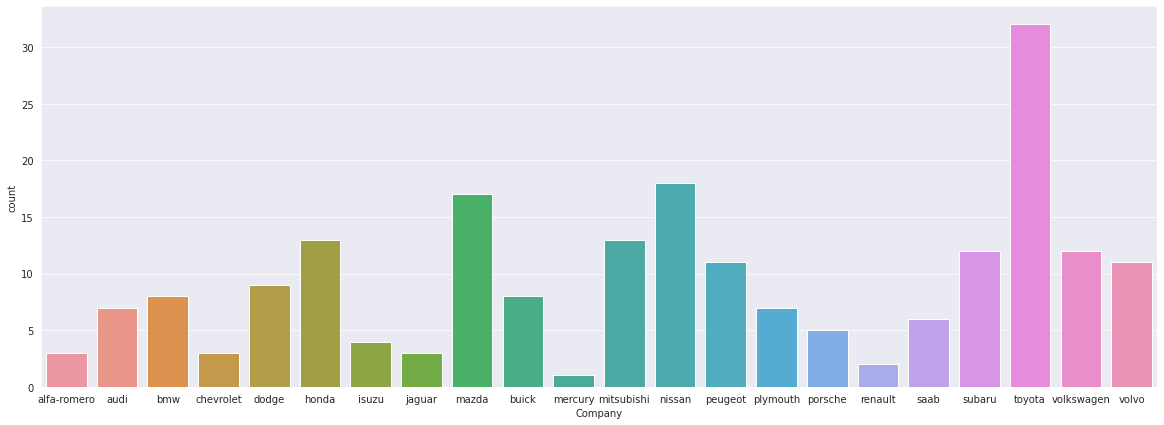

In [15]:
# Check car manufacturers
plt.figure(figsize=[20,7])
sns.countplot(cardata.Company)

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fueltype', ylabel='count'>

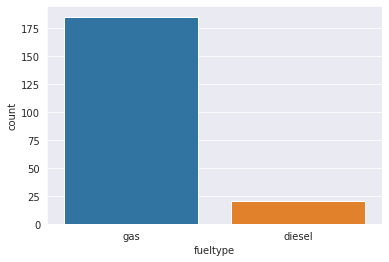

In [16]:
# Check fuel type
sns.countplot(cardata.fueltype)

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='carbody', ylabel='count'>

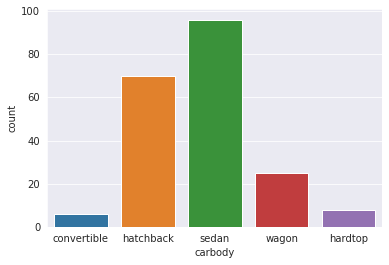

In [17]:
# Cars by body
sns.countplot(cardata.carbody)

<AxesSubplot:xlabel='Company', ylabel='price'>

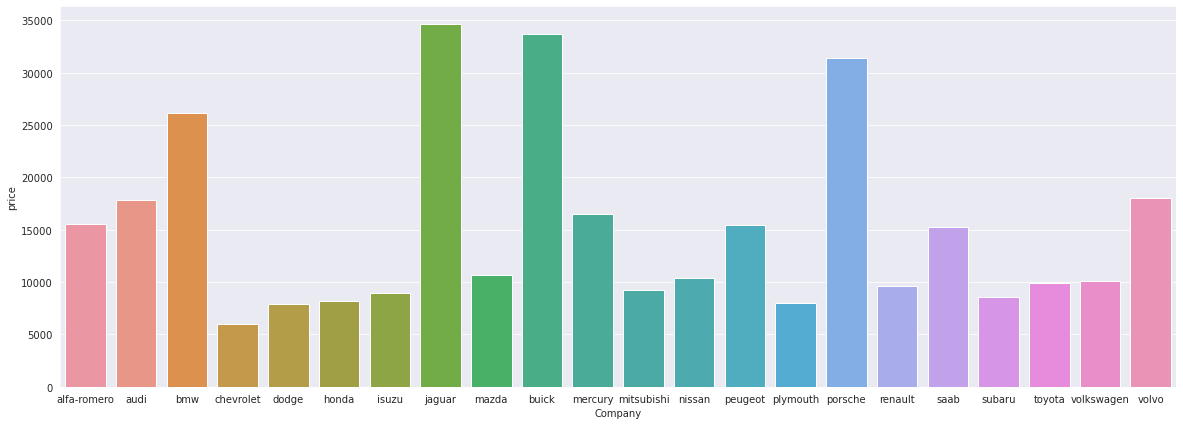

In [18]:
# Prices by brand
plt.figure(figsize=[20,7])
sns.barplot(x=cardata.Company,y=cardata.price,ci=None)

<AxesSubplot:xlabel='fueltype', ylabel='price'>

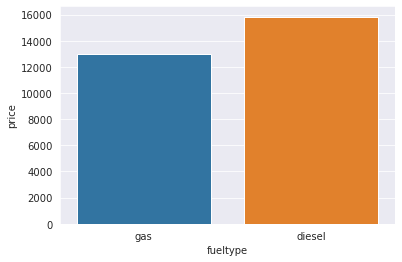

In [19]:
# Prices by fuel type
sns.barplot(x=cardata.fueltype,y=cardata.price,ci=None)

<AxesSubplot:xlabel='carbody', ylabel='price'>

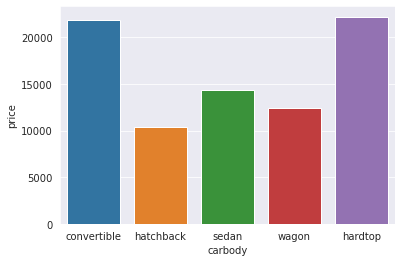

In [20]:
# Prices by body
sns.barplot(x=cardata.carbody,y=cardata.price,ci=None)

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

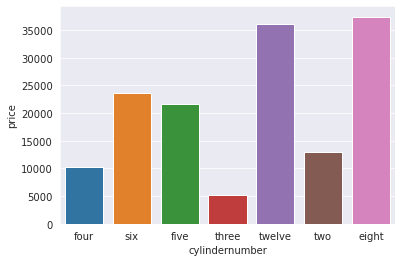

In [21]:
# Relation between number of cylinders and price
sns.barplot(x=cardata.cylindernumber,y=cardata.price,ci=None)

<AxesSubplot:>

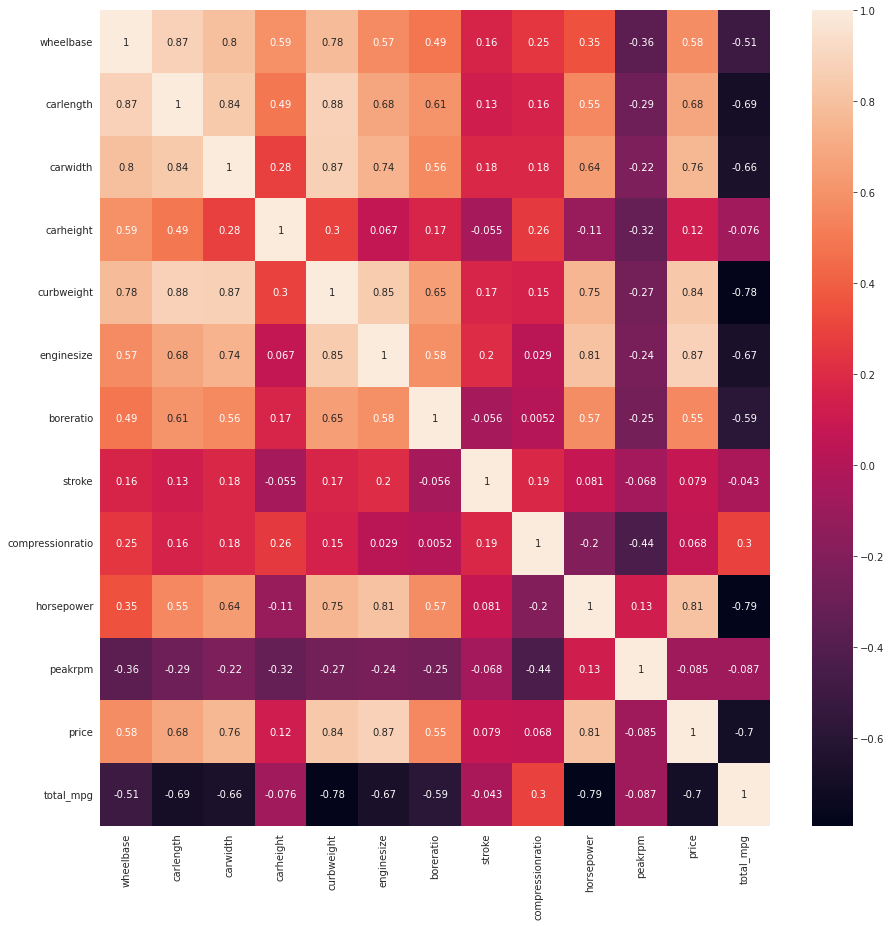

In [22]:
# Correlations across variables
plt.figure(figsize=[15,15])
sns.heatmap(cardata.corr(),annot=True)

In [23]:
# Drop numerical variables with low correlation
cardata.drop(['wheelbase','carheight','boreratio','stroke', 'compressionratio','peakrpm'],axis=1,inplace=True)
cardata.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,154,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,102,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,115,17450.0,19.80


<AxesSubplot:>

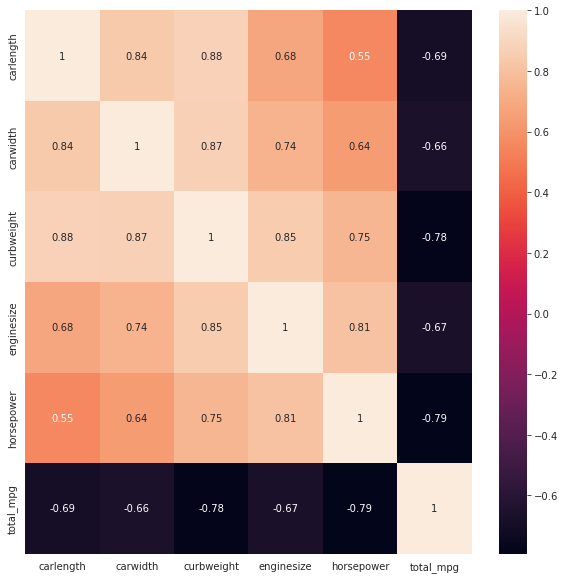

In [24]:
# Multicollinearity
# Now, we shall look for multicollinearity. 
# Two variables are collinear if they are highly correlated. 
# Multicollinearlity happens when there is high correlation between predictors. 
# This is a problem because linear regression doesn’t handle multicollinearity well.
plt.figure(figsize=[10,10])
sns.heatmap(cardata.drop('price',axis=1).corr(),annot=True)

In [25]:
# We need to now handle categorical variables. We can convert them to binary variables using get_dummies()
# Each value in column becomes a separate column after getting the binarization
cardata=pd.get_dummies(cardata)

In [26]:
cardata.columns

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'price', 'total_mpg', 'symboling_-1', 'symboling_-2', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'Company_alfa-romero',
       'Company_audi', 'Company_bmw', 'Company_buick', 'Company_chevrolet',
       'Company_dodge', 'Company_honda', 'Company_isuzu', 'Company_jaguar',
       'Company_mazda', 'Company_mercury', 'Company_mitsubishi',
       'Company_nissan', 'Company_peugeot', 'Company_plymouth',
       'Company_porsche', 'Company_renault', 'Company_saab', 'Company_subaru',
       'Company_toyota', 'Company_volkswagen', 'Company_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginet

### Linear regression modeling

In [27]:
mod = sm_formula.ols('price ~ 1 + horsepower', data=cardata)
lm_1 = mod.fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.48e-48
Time:                        15:26:06   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [28]:
mod = sm_formula.ols('price ~ 1 + enginesize', data=cardata)
lm_1 = mod.fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.35e-65
Time:                        15:26:06   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8005.4455    873.221     -9.168      0.0

In [29]:
mod = sm_formula.ols('price ~ 1 + curbweight', data=cardata)
lm_1 = mod.fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.21e-54
Time:                        15:26:06   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.948e+04   1543.962    -12.614      0.0

In [30]:
mod = sm_formula.ols('price ~ 1 + total_mpg', data=cardata)
lm_1 = mod.fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     191.0
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           4.74e-31
Time:                        15:26:06   Log-Likelihood:                -2064.5
No. Observations:                 205   AIC:                             4133.
Df Residuals:                     203   BIC:                             4140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.645e+04   1724.687     21.137      0.0

In [31]:
# From the above observations, we can select one of the predictors. 
# Since enginesize has highest R2 value and P value of 0, we can select that. 
# The reason for selecting just one of the above predictors is due to high amount of multicollinearity between them. 
# We shall drop the rest.
cardata.drop(['horsepower','curbweight','total_mpg'],axis=1,inplace=True)
cardata.shape

(205, 70)

In [32]:
# We have 70 columns after binarization. 
# We obviously can’t look at all the columns. 
# So, we shall drop all columns which have low correlation.
cols_to_drop=cardata.corr()[(cardata.corr()['price']<=0.5) & (cardata.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
cardata.drop(cols_to_drop,axis=1,inplace=True)

In [33]:
# We are left with only 10 variables.
cardata.shape
cardata.head()

,carlength,carwidth,enginesize,price,Company_buick,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi
0,168.8,64.1,130,13495.0,0,0,1,1,0,1
1,168.8,64.1,130,16500.0,0,0,1,1,0,1
2,171.2,65.5,152,16500.0,0,0,1,0,0,1
3,176.6,66.2,109,13950.0,0,1,0,1,0,1
4,176.6,66.4,136,17450.0,0,0,0,0,0,1


<AxesSubplot:>

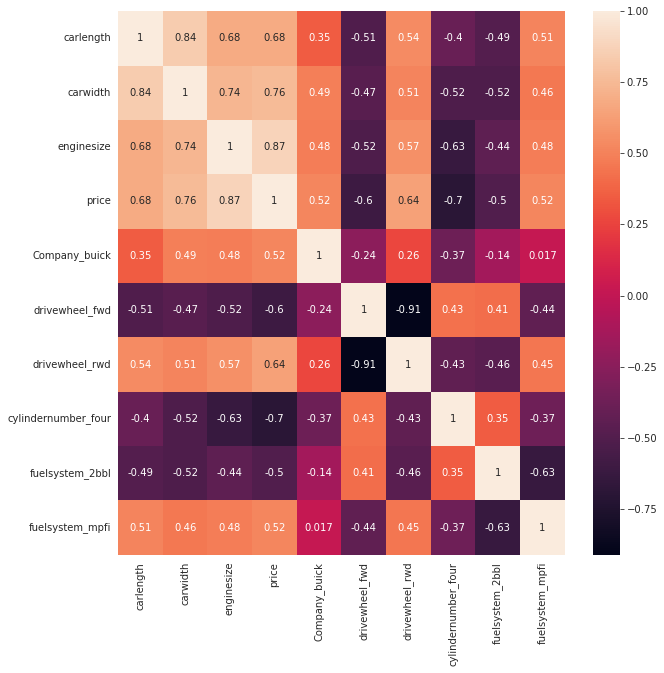

In [34]:
# Let us look at the correlations of the variables left.
plt.figure(figsize=[10,10])
sns.heatmap(cardata.corr(),annot=True)

In [35]:
# We will also drop all columns having correlation to price around 0.5. 
# We will also drop carlength and carwidth since they are highly correlated 
# to each other and significantly correlated with enginesize.
cardata.drop(['carlength','carwidth','Company_buick','fuelsystem_2bbl', 'fuelsystem_mpfi'],axis=1,inplace=True)

In [36]:
# Let us start with enginesize since we know it has a good R2 and P Value.
mod = sm_formula.ols('price ~ 1 + enginesize', data=cardata)
lm_1 = mod.fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.35e-65
Time:                        15:26:07   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8005.4455    873.221     -9.168      0.0

In [37]:
# Let us see if adding forward wheel drive or backward wheel drive improves our model.
mod = sm_formula.ols('price ~ 1 + enginesize + drivewheel_fwd', data=cardata)
lm_2 = mod.fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     390.3
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           4.11e-70
Time:                        15:26:07   Log-Likelihood:                -1970.3
No. Observations:                 205   AIC:                             3947.
Df Residuals:                     202   BIC:                             3957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3510.5293   1160.633     -3.

In [38]:
mod = sm_formula.ols('price ~ 1 + enginesize + drivewheel_rwd', data=cardata)
lm_3 = mod.fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           3.26e-70
Time:                        15:26:07   Log-Likelihood:                -1970.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6378.7190    868.209     -7.

In [39]:
# Let us add both and check.
mod = sm_formula.ols('price ~ 1 + enginesize + drivewheel_fwd + drivewheel_rwd', data=cardata)
lm_4 = mod.fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     262.5
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           3.07e-69
Time:                        15:26:07   Log-Likelihood:                -1969.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     201   BIC:                             3960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4829.7218   1458.548     -3.

In [40]:
# We get a warning saying that there is a strong multicollinearity. 
# It can be explained since both forward wheel drive and backward wheel drives do not coexist. 
# We see that our p values increase beyond 0.005. So, we cannot go with above predictors

# We will add cylindernumber_four variable to our existing models and see if it improves our model.
mod = sm_formula.ols('price ~ 1 + enginesize + drivewheel_rwd + cylindernumber_four', data=cardata)
lm_5 = mod.fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     311.8
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           2.55e-75
Time:                        15:26:07   Log-Likelihood:                -1954.9
No. Observations:                 205   AIC:                             3918.
Df Residuals:                     201   BIC:                             3931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              21.9214   1

In [41]:
mod = sm_formula.ols('price ~ 1 + enginesize + drivewheel_fwd + cylindernumber_four', data=cardata)
lm_6 = mod.fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           6.99e-75
Time:                        15:26:08   Log-Likelihood:                -1955.9
No. Observations:                 205   AIC:                             3920.
Df Residuals:                     201   BIC:                             3933.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2314.0832   1

### Visualization

In [42]:
target = cardata['price']

Text(0, 0.5, 'Car Price')

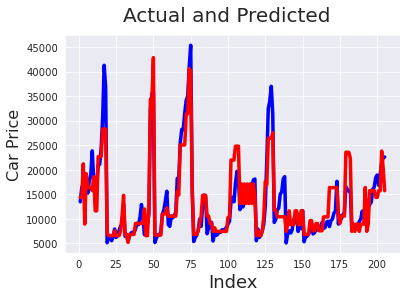

In [43]:
pred=lm_6.predict(cardata)# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 11347528.099728284
r_square_value : 0.8213281339239666


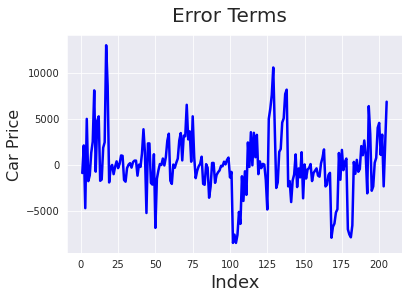

In [44]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Text(0, 0.5, 'Car Price')

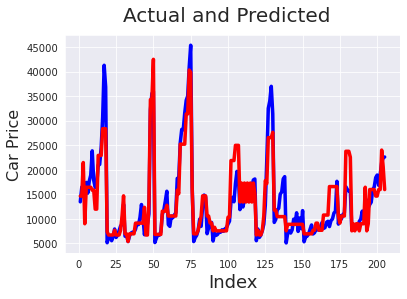

In [45]:
pred=lm_5.predict(cardata)# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 11234025.847691916
r_square_value : 0.8231152772557074


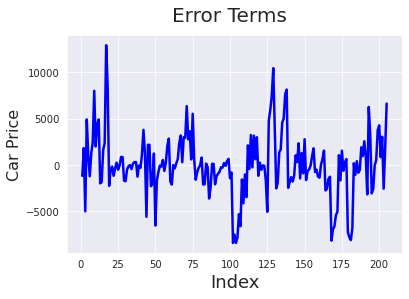

In [46]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)   
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

We can see that models 6 and 5 predict the price pretty well. 

So the solution for our problem statement is to look at enginesize, forward/backward wheel drive and see if the number of cylinders is 4 (which has negative correlation with price) to determine the price.